In [1]:
# Importing all the required libraries and packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import timedelta
from pandas import ExcelWriter

In [2]:
Data = pd.read_excel(r'C:\Users\gkoppadx\OneDrive - Intel Corporation\Desktop\simple\A CAPSTONE PROJECT\Project 3/Online Retail.xlsx')
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Checking shape of data

Data.shape

(541909, 8)

In [4]:
# Check feature details of data

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Checking the missing values in data

Data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Calculating the Missing Values % contribution in DF

Data_null = round(Data.isnull().sum()/len(Data)*100,2)
Data_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# CustomerID is important feature of our analysis since our analysis is centered around Customers only,
# so we can not impute null values CustomerID with mean/ median/ mode in this case.

# We will check possibility to fill null values in CustomerID column,
# By looking up for InvoiceNo of row having null CustomerID in other rows where CustomerID is present.

# If there are still any null values in CustomerID after this process then we will drop complete row having missing CustomerID.
# So we will drop all rows having null values in CustomerID.

invoice_null_custid = set(Data[Data['CustomerID'].isnull()]['InvoiceNo'])
Data[Data['InvoiceNo'].isin(invoice_null_custid) & (Data['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [8]:
Data[Data['InvoiceNo'].isin(invoice_null_custid) & (~Data['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [9]:
# We can drop Description feature from our data since it is not not going to contribute in our model.

Data = Data.drop('Description', axis=1)
Data = Data.dropna()
Data.shape

(406829, 7)

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Quantity     406829 non-null  int64         
 3   InvoiceDate  406829 non-null  datetime64[ns]
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [11]:
# Remove duplicate data records

Data = Data.drop_duplicates()
Data.shape

(401602, 7)

In [12]:
# Perform descriptive anaylysis on the given data

# CustomerID is 'float64', changing the datatype of CustomerId to string,
# as Customer ID as numerical data does not make sense

Data['CustomerID'] = Data['CustomerID'].astype(str)

In [13]:
Data.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice
count,401602.000000,401602,401602.000000
mean,12.182579,2011-07-10 12:08:08.129839872,3.474064
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.283248,NaN,69.764209


In [14]:
# From above data:
# Quantity: Average quantity of each product in transaction is 12.18.
# Also note that minimum value in Quantity column is negative.
# This implies that some customers had returned the product during our period of analysis.

# InvoiceDate: Our data has transaction between 01-12-2010 to 09-12-2011
# UnitPrice: Average price of each product in transactions is 3.47

In [15]:
Data.describe(include=['O'])
# include=['O'], it pulls out the objects dtypes attributes and shows their count/frequency/max/quartiles.

,InvoiceNo,StockCode,CustomerID,Country
count,401602,401602,401602,401602
unique,22190,3684,4372,37
top,576339,85123A,17841.0,United Kingdom
freq,542,2065,7812,356726


In [16]:
# From above data:
# InvoiceNo: Total entries in preprocessed data are 4,01,602 but transactions are 22,190.
# Most number of entries (count of unique products) are in Invoice No. '576339' and is 542 nos.

# StockCode: There are total 3684 unique products in our data,
# And product with stock code '85123A' appears most frequently (2065 times) in our data.

# CustomerID: There are 4372 unique customers in our final preprocessed data.
# Customer with ID '17841' appears most frequently in data (7812 times)

# Country: Company has customers across 37 countries. Most entries are from United Kingdom in our dataset (356726)

In [17]:
# Data Transformation:Perform Cohort Analysis
# Cohort analysis is a tool to measure user engagement over time.
# It helps to know whether user engagement is actually getting better over time or is only appearing to improve because of growth.

# Create month cohort of customers and analyze active customers in each cohort

In [18]:
# Convert InvoiceDate to Year-Month format

Data['month_year'] = Data['InvoiceDate'].dt.to_period('M')
Data['month_year'].nunique()

13

In [19]:
month_cohort = Data.groupby('month_year')['CustomerID'].nunique()
month_cohort

month_year
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of active customers in each month')

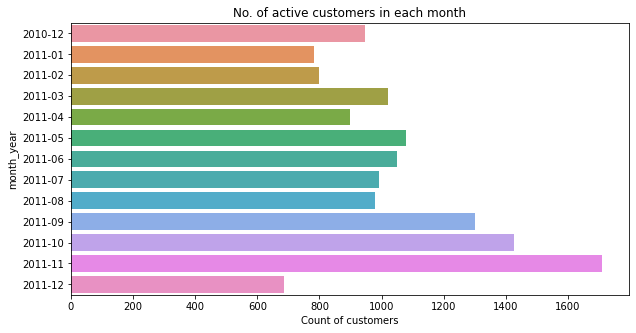

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(y = month_cohort.index, x = month_cohort.values);
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")

In [21]:
#  Analyze the retention rate of customers:

In [22]:
month_cohort - month_cohort.shift(1)

month_year
2010-12       NaN
2011-01    -165.0
2011-02      15.0
2011-03     222.0
2011-04    -121.0
2011-05     180.0
2011-06     -28.0
2011-07     -58.0
2011-08     -13.0
2011-09     322.0
2011-10     123.0
2011-11     286.0
2011-12   -1025.0
Freq: M, Name: CustomerID, dtype: float64

In [23]:
retention_rate = round(month_cohort.pct_change(periods=1)*100,2)
retention_rate

month_year
2010-12      NaN
2011-01   -17.41
2011-02     1.92
2011-03    27.82
2011-04   -11.86
2011-05    20.02
2011-06    -2.59
2011-07    -5.52
2011-08    -1.31
2011-09    32.86
2011-10     9.45
2011-11    20.07
2011-12   -59.91
Freq: M, Name: CustomerID, dtype: float64

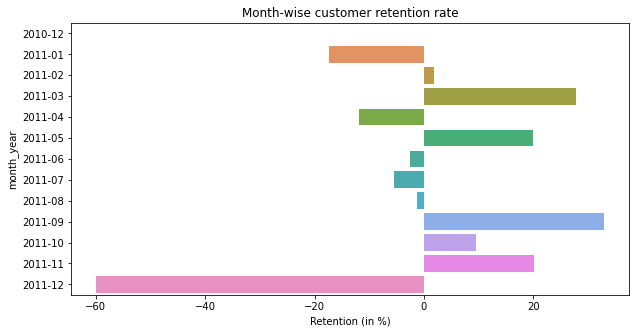

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(y = retention_rate.index, x = retention_rate.values);
plt.xlabel("Retention (in %)")
plt.title("Month-wise customer retention rate");

In [25]:
# Monetary analysis:

In [26]:
Data['amount'] = Data['Quantity']*Data['UnitPrice']
Data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [27]:
Data_monetary = Data.groupby('CustomerID').sum()['amount'].reset_index()
Data_monetary

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


In [28]:
# Frequency Analysis:

In [29]:
Data_frequency = Data.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
Data_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [30]:
# Recency Analysis:

In [31]:
# We will fix reference date for calculating recency as last transaction day in data + 1 day

ref_day = max(Data['InvoiceDate']) + timedelta(days=1)
ref_day

Timestamp('2011-12-10 12:50:00')

In [32]:
Data['days_to_last_order'] = (ref_day - Data['InvoiceDate']).dt.days
Data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,amount,days_to_last_order
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,374
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,374
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,374


In [33]:
Data_recency = Data.groupby('CustomerID')['days_to_last_order'].min().reset_index()
Data_recency

,CustomerID,days_to_last_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4367,18280.0,278
4368,18281.0,181
4369,18282.0,8
4370,18283.0,4


In [34]:
# Calculate RFM metrics:

In [35]:
Data_rf = pd.merge(Data_recency, Data_frequency,  on='CustomerID', how='inner')
Data_rfm = pd.merge(Data_rf, Data_monetary, on='CustomerID', how='inner')
Data_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
Data_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


newest    2734
newer      588
medium     416
older      353
oldest     281
Name: recency_labels, dtype: int64

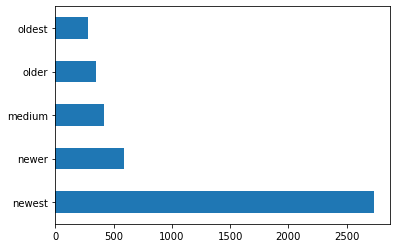

In [36]:
# Build RFM Segments:

Data_rfm['recency_labels'] = pd.cut(Data_rfm['Recency'], bins=5,
                                     labels=['newest', 'newer', 'medium', 'older', 'oldest'])
Data_rfm['recency_labels'].value_counts().plot(kind='barh');
Data_rfm['recency_labels'].value_counts()

lowest     4348
lower        18
medium        3
highest       2
higher        1
Name: frequency_labels, dtype: int64

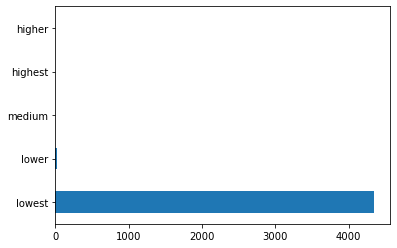

In [37]:
Data_rfm['frequency_labels'] = pd.cut(Data_rfm['Frequency'], bins=5, 
                                      labels=['lowest', 'lower', 'medium', 'higher', 'highest'])
Data_rfm['frequency_labels'].value_counts().plot(kind='barh');
Data_rfm['frequency_labels'].value_counts()

smallest    4357
smaller        9
medium         3
largest        2
larger         1
Name: monetary_labels, dtype: int64

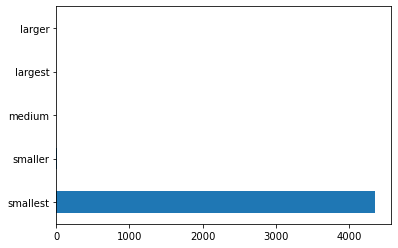

In [38]:
Data_rfm['monetary_labels'] = pd.cut(Data_rfm['Monetary'], bins=5, 
                                     labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])
Data_rfm['monetary_labels'].value_counts().plot(kind='barh');
Data_rfm['monetary_labels'].value_counts()

In [39]:
Data_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels
0,12346.0,326,2,0.00,oldest,lowest,smallest
1,12347.0,2,7,4310.00,newest,lowest,smallest
2,12348.0,75,4,1797.24,newest,lowest,smallest
3,12349.0,19,1,1757.55,newest,lowest,smallest
4,12350.0,310,1,334.40,oldest,lowest,smallest


In [40]:
Data_rfm['rfm_segment'] = Data_rfm[['recency_labels','frequency_labels','monetary_labels']].agg('_'.join, axis=1)
Data_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest_lowest_smallest
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest_lowest_smallest
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest_lowest_smallest
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest_lowest_smallest
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest_lowest_smallest


In [41]:
# RFM Score:

recency_dict = {'newest': 5, 'newer':4, 'medium': 3, 'older':2, 'oldest':1}
frequency_dict = {'lowest':1, 'lower':2, 'medium': 3, 'higher':4, 'highest':5}
monetary_dict = {'smallest':1, 'smaller':2, 'medium': 3, 'larger':4, 'largest':5}

Data_rfm['rfm_score'] = (Data_rfm['recency_labels'].map(recency_dict).astype(int)+ Data_rfm['frequency_labels']
                         .map(frequency_dict).astype(int) + Data_rfm['monetary_labels'].map(monetary_dict).astype(int))

Data_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest_lowest_smallest,3
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest_lowest_smallest,7
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest_lowest_smallest,7
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest_lowest_smallest,7
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest_lowest_smallest,3
5,12352.0,36,11,1545.41,newest,lowest,smallest,newest_lowest_smallest,7
6,12353.0,204,1,89.00,medium,lowest,smallest,medium_lowest_smallest,5
7,12354.0,232,1,1079.40,older,lowest,smallest,older_lowest_smallest,4
8,12355.0,214,1,459.40,medium,lowest,smallest,medium_lowest_smallest,5
9,12356.0,23,3,2811.43,newest,lowest,smallest,newest_lowest_smallest,7


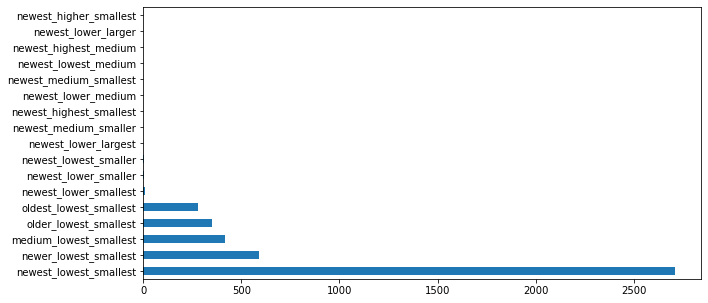

In [42]:
# Analyze RFM Segment and Score:

Data_rfm['rfm_segment'].value_counts().plot(kind='barh', figsize=(10, 5));

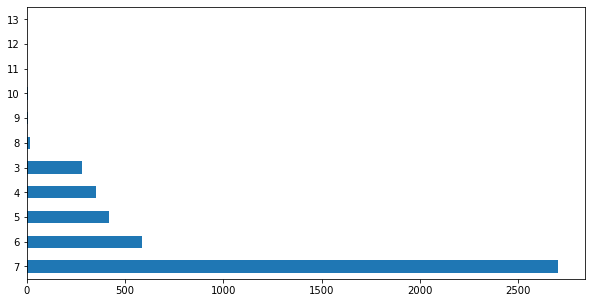

In [43]:
Data_rfm['rfm_score'].value_counts().plot(kind='barh', figsize=(10, 5));

# Data Modeling:

In [44]:
# Create clusters using k-means clustering algorithm.

# Prepare the data for the algorithm.
# If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

In [45]:
print(Data_rfm.shape)
Data_rfm.head()

(4372, 9)


,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest_lowest_smallest,3
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest_lowest_smallest,7
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest_lowest_smallest,7
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest_lowest_smallest,7
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest_lowest_smallest,3


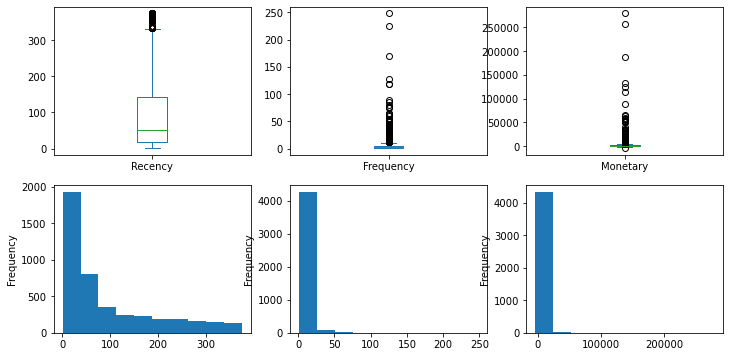

In [46]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    Data_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    Data_rfm[feature].plot(kind='hist')

In [47]:
# From above data:
# Frequency and Monetary features in above data seem to have lot of outliers. Lets drop them.

In [48]:
Data_rfm = Data_rfm[(Data_rfm['Frequency']<60) & (Data_rfm['Monetary']<40000)]
Data_rfm.shape

(4346, 9)

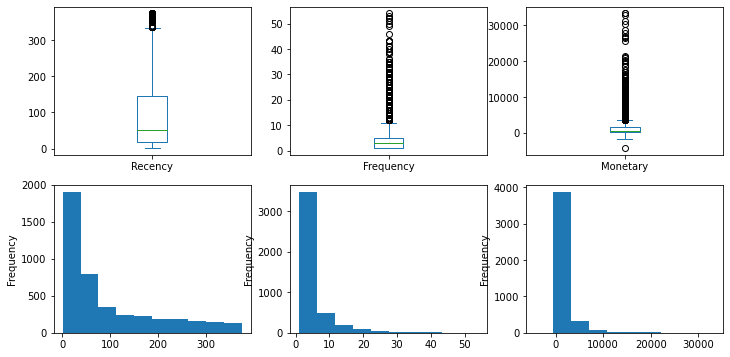

In [49]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    Data_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    Data_rfm[feature].plot(kind='hist')

In [50]:
# Now since all three features have right skewed data, we will use log transformation of these features in our model.

In [51]:
Data_rfm_log_trans = pd.DataFrame()
Data_rfm_log_trans['Recency'] = np.log(Data_rfm['Recency'])
Data_rfm_log_trans['Frequency'] = np.log(Data_rfm['Frequency'])
Data_rfm_log_trans['Monetary'] = np.log(Data_rfm['Monetary']-Data_rfm['Monetary'].min()+1)

In [52]:
Data_rfm_log_trans.head()

,Recency,Frequency,Monetary
0,5.786897,0.693147,8.363723
1,0.693147,1.945910,9.059358
2,4.317488,1.386294,8.713725
3,2.944439,0.000000,8.707182
4,5.736572,0.000000,8.438806


In [53]:
# Standard Scalar Transformation: It is extremely important to rescale the features so that they have a comparable scale.

In [54]:
scaler = StandardScaler()

Data_rfm_scaled = scaler.fit_transform(Data_rfm_log_trans[['Recency', 'Frequency', 'Monetary']])
Data_rfm_scaled

Data_rfm_scaled = pd.DataFrame(Data_rfm_scaled)
Data_rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
Data_rfm_scaled.head()

,Recency,Frequency,Monetary
0,1.402988,-0.388507,-0.770922
1,-2.100874,0.967301,1.485132
2,0.392218,0.361655,0.364190
3,-0.552268,-1.138669,0.342970
4,1.368370,-1.138669,-0.527416


In [55]:
# Build K-Means Clustering Model and Decide the optimum number of clusters to be formed.

In [56]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(Data_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [57]:
kmeans.labels_

array([1, 0, 2, ..., 2, 0, 2])

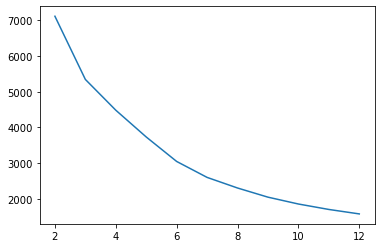

In [58]:
# Finding the Optimal Number of Clusters with the help of Elbow Curve/ SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(Data_rfm_scaled)
    
    ssd.append(kmeans.inertia_)
    
    
# plot the SSDs for each n_clusters

plt.plot(range_n_clusters,ssd);

In [59]:
# Creating dataframe for exporting to create visualization in tableau later
Data_inertia = pd.DataFrame(list(zip(range_n_clusters, ssd)), columns=['clusters', 'intertia'])
Data_inertia

,clusters,intertia
0,2,7113.097396
1,3,5343.136928
2,4,4481.022293
3,5,3730.805717
4,6,3045.029702
5,7,2598.464837
6,8,2301.370633
7,9,2044.740060
8,10,1852.941597
9,11,1700.376798


In [60]:
# Finding the Optimal Number of Clusters with the help of Silhouette Analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Data_rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Data_rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.44132753537785846
For n_clusters=3, the silhouette score is 0.37962225322302756
For n_clusters=4, the silhouette score is 0.3623606426972478
For n_clusters=5, the silhouette score is 0.36686786887528716
For n_clusters=6, the silhouette score is 0.3441911617174347
For n_clusters=7, the silhouette score is 0.3428617732216645
For n_clusters=8, the silhouette score is 0.3352730467143602
For n_clusters=9, the silhouette score is 0.346301798458803
For n_clusters=10, the silhouette score is 0.3560807144631476


In [61]:
# From above data
# We can select optimum number of clusters as 3 in our final model

In [62]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(Data_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [63]:
 # Analyze these clusters and comment on the results.

In [64]:
# assign the label
Data_rfm['Cluster_Id'] = kmeans.labels_
Data_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score,Cluster_Id
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest_lowest_smallest,3,1
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest_lowest_smallest,7,2
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest_lowest_smallest,7,0
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest_lowest_smallest,7,1
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest_lowest_smallest,3,1


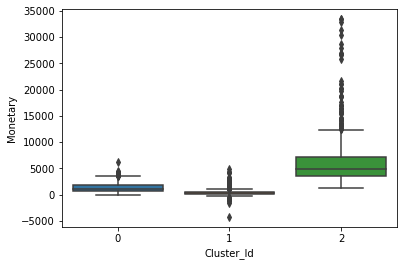

In [65]:
# Box plot to visualize Cluster Id vs Monetary
sns.boxplot(x='Cluster_Id', y='Monetary', data=Data_rfm);

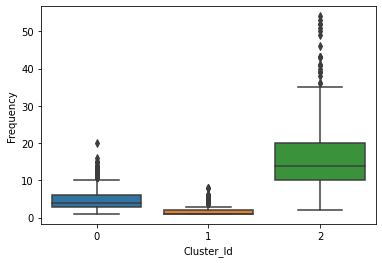

In [66]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=Data_rfm);

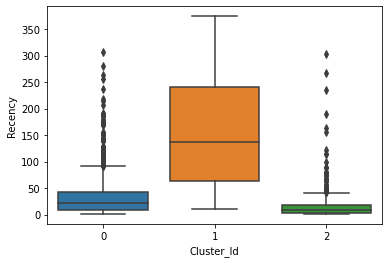

In [67]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=Data_rfm);

# Final Inference from the Analysis:
# As we can observe from above boxplots that our model has nicely created 3 segements of customer with the interpretation as below:

# Customers with Cluster Id 0 are less frequent buyers with low monetary expenditure and also they have not purchased anything in recent time and hence least important for business.
# Customers with Cluster Id 1 are the customers having Recency, Frequency and Monetary score in the medium range.
# Customers with Cluster Id 2 are the most frequent buyers, spending high amount and recently placing orders so they are the most important customers from business point of view.

In [72]:
# Writing dataframe to excel file for creating visualization in tableau

writer = pd.ExcelWriter('C:\\Users\\gkoppadx\\OneDrive - Intel Corporation\\Desktop\\simple\\A CAPSTONE PROJECT\\output_data.xlsx', engine='xlsxwriter')

Data.to_excel(writer, sheet_name='master_data', index=False)
Data_rfm.to_excel(writer, sheet_name='rfm_data', index=False)
Data_inertia.to_excel(writer, sheet_name='inertia', index=False)
writer.save()

In [74]:
product_desc = pd.read_excel(r'C:\Users\gkoppadx\OneDrive - Intel Corporation\Desktop\simple\A CAPSTONE PROJECT\Project 3/Online Retail.xlsx')
product_desc = product_desc[['StockCode', 'Description']]
product_desc = product_desc.drop_duplicates()
product_desc.to_csv('product_desc.csv', index=False)

In [76]:
product_desc.head()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
